In [8]:
import pandas as pd
import glob
import datetime
import time
import matplotlib.pyplot as plt

In [33]:
def generateFreqRes(filesThatDate,date):
    print(date)
    dfs = [pd.read_csv(file) for file in filesThatDate]
    df = pd.concat([df[col] for df in dfs for col in df.columns if 'momentum' in col])
    df_value_counts = df.value_counts()
    #df_value_counts.to_csv(freqFilesPath+'dailyfreqfile_'+str(date).split(' ')[0]+'.csv')
    plot = pd.read_csv(freqFilesPath+'dailyfreqfile_'+str(date).split(' ')[0]+'.csv',index_col=0).plot.barh(legend=False)
    fig = plot.get_figure()
    plt.show()
    plt.close()
    #fig.savefig(freqFilesPath+'barplot_'+str(date).split(' ')[0]+'.png', bbox_inches='tight')


In [34]:
def get_files_sorted_by_date_after_a_date(look_for_this_pattern,cutoffdate):
    
    csvs = glob.glob(look_for_this_pattern)
    datetimes=[datetime.datetime(int(each.split('/')[-1][37:41]),
                                 int(each.split('/')[-1][42:44]),
                                 int(each.split('/')[-1][45:47]),
                                 int(each.split('/')[-1][48:50]),
                                 int(each.split('/')[-1][51:53])) for each in csvs]

    dt_csvs_filtered=[[dt, csv] for dt, csv in zip(datetimes,csvs) if dt >= datetime.datetime(*cutoffdate)]
    
    sorted_filtered_csvs = [csv
                        for _, csv in sorted(
                                         zip([eachpair[0] for eachpair in dt_csvs_filtered],
                                             [eachpair[1] for eachpair in dt_csvs_filtered]))]
    
    return sorted_filtered_csvs


In [35]:
def getFilesOnGivenDate(day):
    
    dayafterday = day + datetime.timedelta(days=1)
    
    return list(
    set(get_files_sorted_by_date_after_a_date(momFilesPathAndWildCard,[day.year,day.month,day.day,0]))-\
    set(get_files_sorted_by_date_after_a_date(momFilesPathAndWildCard,[dayafterday.year,dayafterday.month,dayafterday.day,0])))


In [36]:
def doThisWhenNotEnoughFilesForDay(sleepThisMuch=60*60,day=None):
    print('Not enough files found. '+str(day)+' Sleeping '+str(sleepThisMuch/60)+' minutes.')
    time.sleep(sleepThisMuch)

In [37]:
def didMoreThanThisManySecondsElapsedSinceEndOfThatDay(singleDate,seconds):
    return (datetime.datetime.now() - (singleDate + datetime.timedelta(days=1))).total_seconds() > seconds

In [38]:
freqFilesPath = '/mnt/volume/jupyter/szokereso/cron/szokeresores/dailyfreqs/'
momFilesPathAndWildCard  = '/mnt/volume/jupyter/szokereso/cron/szokeresores/momentumraszurt/live_updated3_dict_onlymomentum_data_*_dfUnifiedNanFilteredOnlySomeColsUpdated3.csv'

2020-07-01 00:00:00


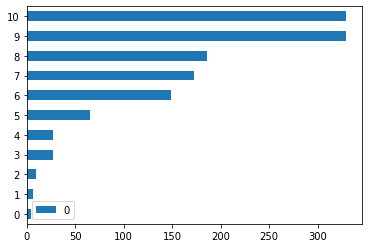

2020-07-01 00:00:00
2020-07-02 00:00:00


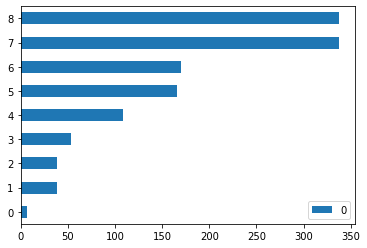

2020-07-02 00:00:00


In [39]:
start_date = datetime.datetime(2020,7,1)
day_count = 1000

for single_date in (start_date + datetime.timedelta(n) for n in range(2)):
    filesThatDate = getFilesOnGivenDate(single_date)
    if len(filesThatDate) < 12 and not didMoreThanThisManySecondsElapsedSinceEndOfThatDay(single_date, 600):
        doThisWhenNotEnoughFilesForDay(sleepThisMuch=120*60,day=single_date)
    else:
        generateFreqRes(filesThatDate,single_date)
        print(single_date)

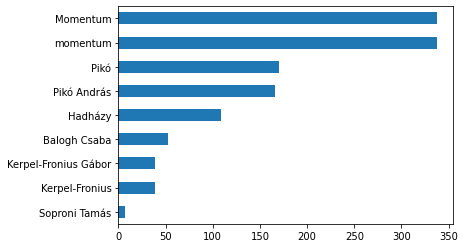

In [51]:
pd.read_csv(freqFilesPath+'dailyfreqfile_'+str('2020-07-02').split(' ')[0]+'.csv',index_col=0).plot.barh(legend=False)